Missing Values per Column:
Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Number of Duplicate Rows: 5


C:\Users\likit\AppData\Local\Temp\ipykernel_3396\2757828566.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\likit\AppData\Local\Temp\ipykernel_3396\2757828566.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

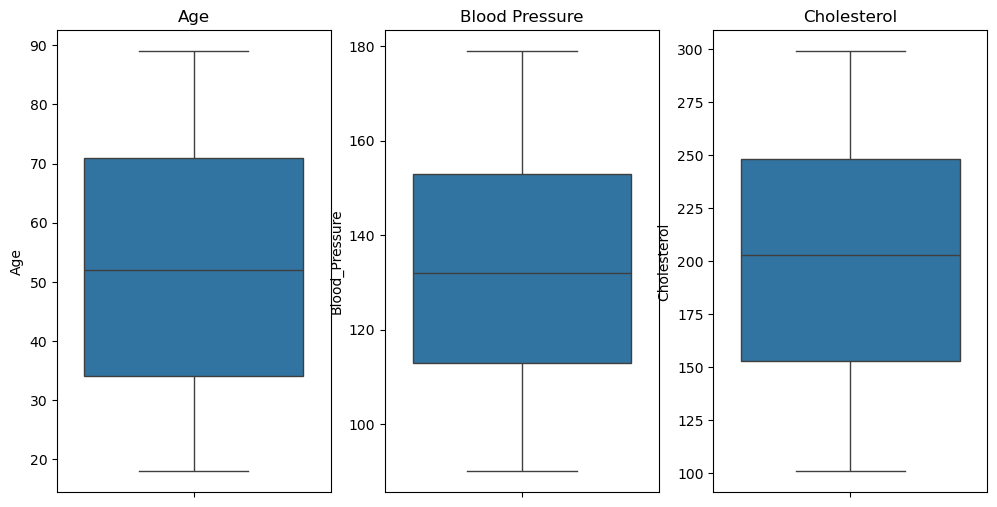


Missing Values After Cleaning:
Patient_ID        0
Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Diabetes          0
Heart_Disease     0
dtype: int64

Number of Duplicates After Cleaning: 0

Data Types:
Patient_ID          int64
Age               float64
Gender              int64
Blood_Pressure    float64
Cholesterol       float64
Diabetes            int64
Heart_Disease       int64
dtype: object

Cleaned dataset saved as 'Cleaned_Healthcare_Dataset.csv'.


In [5]:
# Step 1: Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv('Day_16_Healthcare_Data.csv')

# Step 2: Handle Missing Data

# Identify missing values
print("Missing Values per Column:")
print(df.isna().sum())

# Impute missing values
# Mean imputation for numerical columns
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Blood_Pressure'].fillna(df['Blood_Pressure'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)

# Mode imputation for categorical columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Step 3: Detect and Handle Duplicates

# Identify duplicate records
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Step 4: Detect and Handle Outliers

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Age')

plt.subplot(1, 3, 2)
sns.boxplot(df['Blood_Pressure'])
plt.title('Blood Pressure')

plt.subplot(1, 3, 3)
sns.boxplot(df['Cholesterol'])
plt.title('Cholesterol')

plt.show()

# Handle outliers using capping (e.g., 1st and 99th percentiles)
def cap_outliers(column):
    lower_bound = column.quantile(0.01)
    upper_bound = column.quantile(0.99)
    return column.clip(lower_bound, upper_bound)

df['Age'] = cap_outliers(df['Age'])
df['Blood_Pressure'] = cap_outliers(df['Blood_Pressure'])
df['Cholesterol'] = cap_outliers(df['Cholesterol'])

# Step 5: Standardize and Normalize Data

# Convert categorical variables into numerical representations
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Heart_Disease'] = df['Heart_Disease'].map({'Yes': 1, 'No': 0})

# Scale numerical variables using Min-Max Scaling
scaler = MinMaxScaler()
df[['Age', 'Blood_Pressure', 'Cholesterol']] = scaler.fit_transform(df[['Age', 'Blood_Pressure', 'Cholesterol']])

# Alternatively, use Standard Scaling
# scaler = StandardScaler()
# df[['Age', 'Blood_Pressure', 'Cholesterol']] = scaler.fit_transform(df[['Age', 'Blood_Pressure', 'Cholesterol']])

# Step 6: Data Validation

# Ensure no missing values or duplicates remain
print("\nMissing Values After Cleaning:")
print(df.isna().sum())

print("\nNumber of Duplicates After Cleaning:", df.duplicated().sum())

# Check data types
print("\nData Types:")
print(df.dtypes)

# Step 7: Final Data Export

# Save the cleaned dataset
df.to_csv('Cleaned_Healthcare_Dataset.csv', index=False)
print("\nCleaned dataset saved as 'Cleaned_Healthcare_Dataset.csv'.")